<a href="https://colab.research.google.com/github/gimhanul/dataAnalysis/blob/master/02_pandas_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# matplotlib 시각화 모듈
+ **matplotlib.pyplot** : 파이썬에서 매트랩과 유사한 그래프 표시를 가능케 하는 패키지

🏷️ **코랩 환경에서 한글 폰트 사용하기**
```
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum
```

In [ ]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

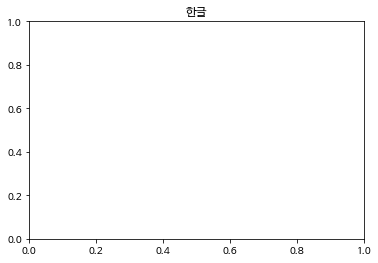

In [ ]:
plt.title('한글')
plt.show()

## 기본 그래프 그리기
+ plt.plot() 
  + 선모양 정하기 
    + **색상**
      - b(파란색), g(초록색), r(빨간색), c(청록색), y(노란색), k(검은색), w(흰색)
    + **마커**
      - o(원), v(역삼각형), ^(삼각형), s(네모), +(플러스), .(점)
    + **선스타일**
      - \-(solid line), --(dashed line ), -. (dash-dot line), : (dotted line )

+ **그래프 크기 조절**
  + plt.figure(figsize=(가로,세로)) 
    - figsize를 이용하여 가로, 세로 길이 조절 가능 (inch 단위)

+ **그래프 제목 추가하기**
  + plt.title('그래프제목') 
  + plt.xlabel('x축 제목')
  + plt.ylabel('y축 제목')

+ **그리드 (grid)**
  + grid() 함수의 첫번째 파라미터를 True로 설정하면 그래프에 그리드 (grid)가 표시 
  + alpha:  그리드의 투명도를 설정
    - 0으로 설정하면 투명하게, 1은 불투명하게 표시
  + linestyle : 선의 스타일을 대쉬 (Dashed)로 설정 

+ **수평 / 수직선 그리기**
  + plt.axvline(x, color) : 축을 가로지르는 세로 선 생성
  + plt.axhline(y, color) : 축을 가로지르는 가로 선 생성

+ **글자 쓰기**
  + plt.text(x, y, s, fontsize) : 원하는 위치에 텍스트 생성

+ **x축 눈금 표시 및 회전**
  + plt.xticks(범위, labels=레이블리스트, rotation=90)

+ **범례 표시**
  + plt.legend(loc='best')

In [ ]:
#데이터 불러오기
import pandas as pd

In [ ]:
# 인구분석_출생사망2.csv 불러오기 
df = pd.read_csv('/content/drive/MyDrive/datathon/class/data/인구분석_출생사망2.csv')
df.head()

,년도,출생아수,사망자수,혼인건수,자연증가수,전년출생아수,전년대비출생아수,증감
0,1971,1024773,237528,239457,787245,1006645,18128,증가
1,1972,952780,210071,244780,742709,1024773,-71993,감소
2,1973,965521,267460,259112,698061,952780,12741,증가
3,1974,922823,248807,259604,674016,965521,-42698,감소
4,1975,874030,270657,283226,603373,922823,-48793,감소


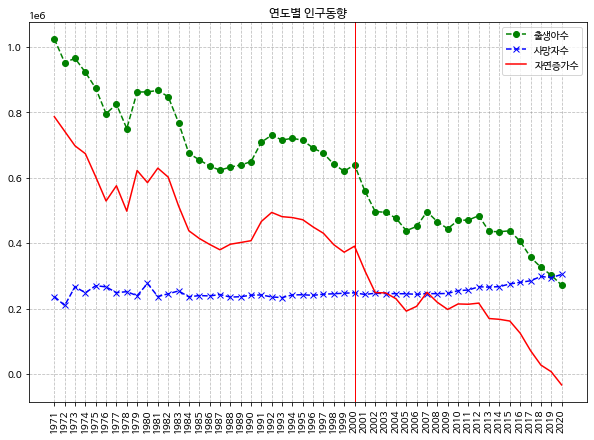

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(df['출생아수'],'go--', label='출생아수')
plt.plot(df['사망자수'], 'bx--', label='사망자수')
plt.plot(df['자연증가수'], 'r-', label='자연증가수') 

plt.title('연도별 인구동향') #제목지정
plt.grid(True, color='gray', alpha=0.5, linestyle='--') #grid 
plt.axvline(x=df[df['년도']==2000].index, color='r', linewidth=1) #수직선 그리기
plt.xticks(range(len(df)), labels=df['년도'], rotation=90) #x축 세로로 돌리깅
plt.legend() #범례 표시
plt.show()

## 여러가지 그래프 
+ 막대 그래프 : plt.bar(x, y)
+ 산점도 그래프 : plt.scatter(x, y)
+ 히스토그램 : plt.hist(value)
+ 박스플롯 : plt.boxplot(value)


## 여러개의 그래프 그리기
+ plt.subplot(행, 열, 위치)

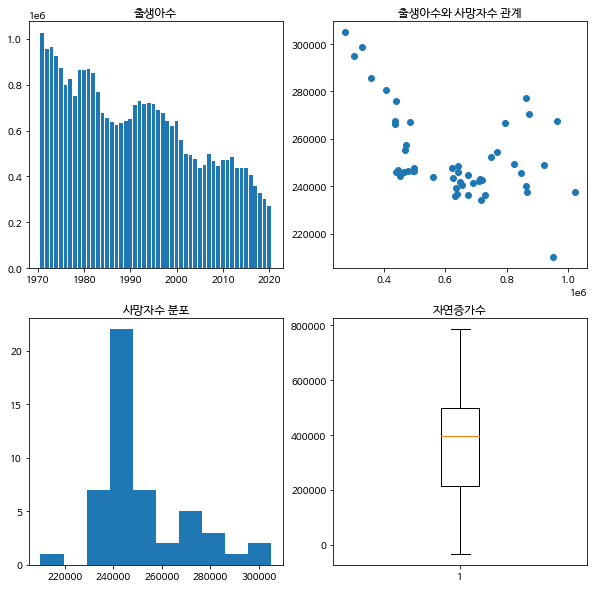

In [8]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title('출생아수')
plt.bar(df['년도'], df['출생아수'])


plt.subplot(2,2,2)
plt.title('출생아수와 사망자수 관계')
plt.scatter(df['출생아수'], df['사망자수'])

plt.subplot(2,2,3)
plt.title('사망자수 분포')
plt.hist(df['사망자수'])

plt.subplot(2,2,4)
plt.title('자연증가수')
plt.boxplot(df['자연증가수'])
plt.show()

## 판다스 내장그래프

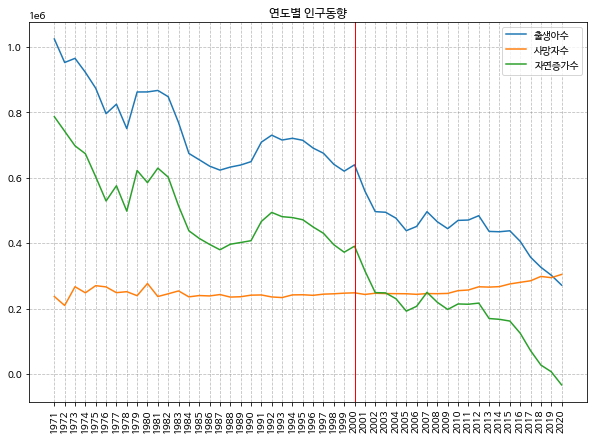

In [9]:
df[['출생아수', '사망자수','자연증가수']].plot(figsize=(10,7))

plt.title('연도별 인구동향')
plt.grid(True, color='gray', alpha=0.5, linestyle='--')
plt.axvline(x=df[df['년도']==2000].index, color='r', linewidth=1)
plt.xticks(range(len(df)), labels=df['년도'], rotation=90)
plt.legend()
plt.show() 

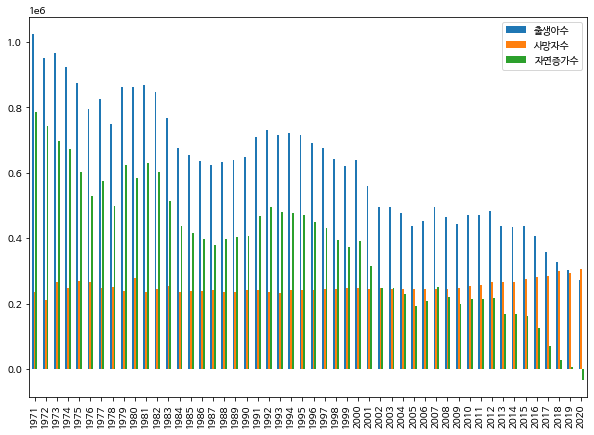

In [10]:
df[['출생아수', '사망자수','자연증가수']].plot(figsize=(10,7), kind='bar')
plt.xticks(range(len(df)), labels=df['년도'], rotation=90)
plt.show()

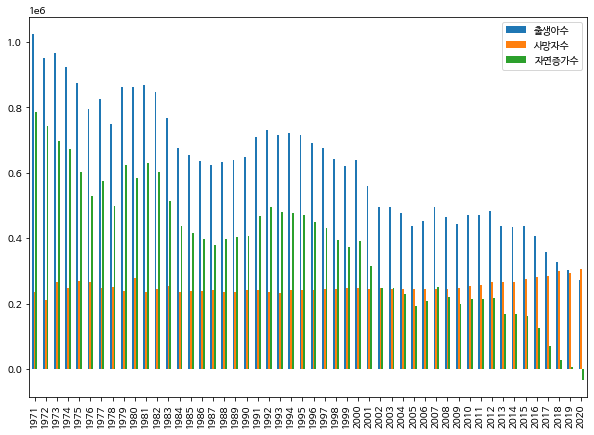

In [11]:
df[['출생아수', '사망자수','자연증가수']].plot.bar(figsize=(10,7))
plt.xticks(range(len(df)), labels=df['년도'], rotation=90)
plt.show()

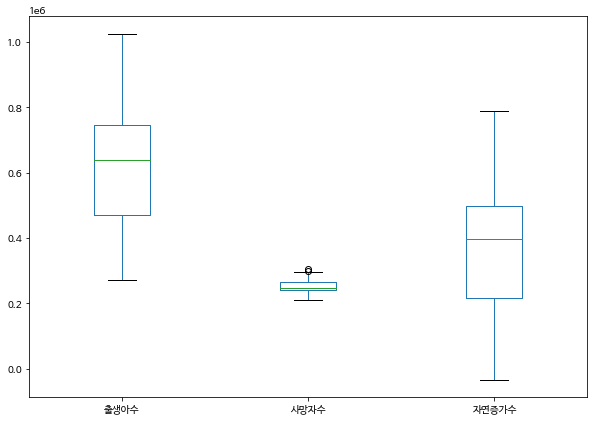

In [12]:
df[['출생아수', '사망자수','자연증가수']].plot(figsize=(10,7), kind='box') 
plt.show()

# Seaborn
+ Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
+ 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존
+ 데이터프레임으로 다양한 통계 지표를 낼 수 있는 시각화 차트를 제공하기 때문에 데이터 분석에 활발히 사용되고 있는 패키지
+ 다차원 데이터 분석시 고려 사항
  + 분석하고자 하는 데이터가 모두 실수 값인 경우
  + 분석하고자 하는 데이터가 모두 카테고리 값인 경우
  + 분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우


In [13]:
import seaborn as sns

## 시각화를 이용한 데이터 분포 확인
+ 범주형 : countplot
+ 수치형
  + 이산형 : barplot
  + 연속형 : kdeplot, histogram
+ 범주형 + 수치형 : boxplot, violinplot, etc
+ 수치형 + 수치형 : scatter
+ 범주형 + 범주형 : heatmap

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   년도        50 non-null     int64 
 1   출생아수      50 non-null     int64 
 2   사망자수      50 non-null     int64 
 3   혼인건수      50 non-null     int64 
 4   자연증가수     50 non-null     int64 
 5   전년출생아수    50 non-null     int64 
 6   전년대비출생아수  50 non-null     int64 
 7   증감        50 non-null     object
dtypes: int64(7), object(1)
memory usage: 3.2+ KB


In [18]:
df['증감'].unique()
df2 = df['증감'].value_counts()

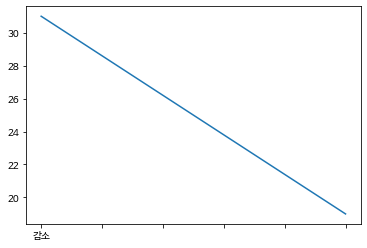

In [19]:
df2.plot()
plt.show()

## count plot
+ 각 **범주형 값**별로 데이터가 얼마나 있는지 표시

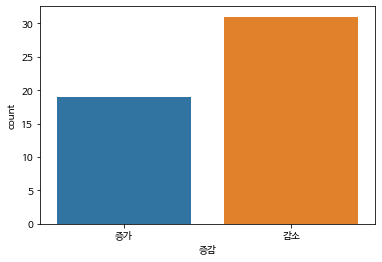

In [22]:
sns.countplot(x='증감', data=df)
plt.show()

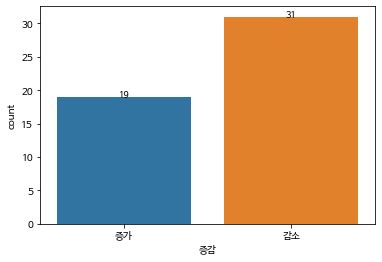

In [24]:
ax = sns.countplot(x='증감', data=df) #그래프 저장

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height , height, ha = 'center', size = 9)
plt.show()

## barplot
+ **카테고리 값에 따른 실수 값**의 평균과 편차를 표시하는 기본적인 바 차트를 생성
+ 평균은 막대의 높이로, 편차는 에러바(error bar)로 표시

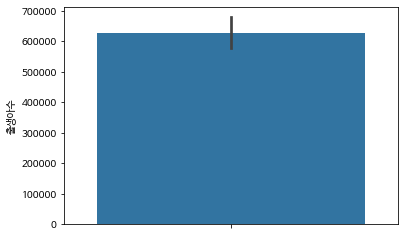

In [25]:
sns.barplot(y='출생아수', data=df)
plt.show()

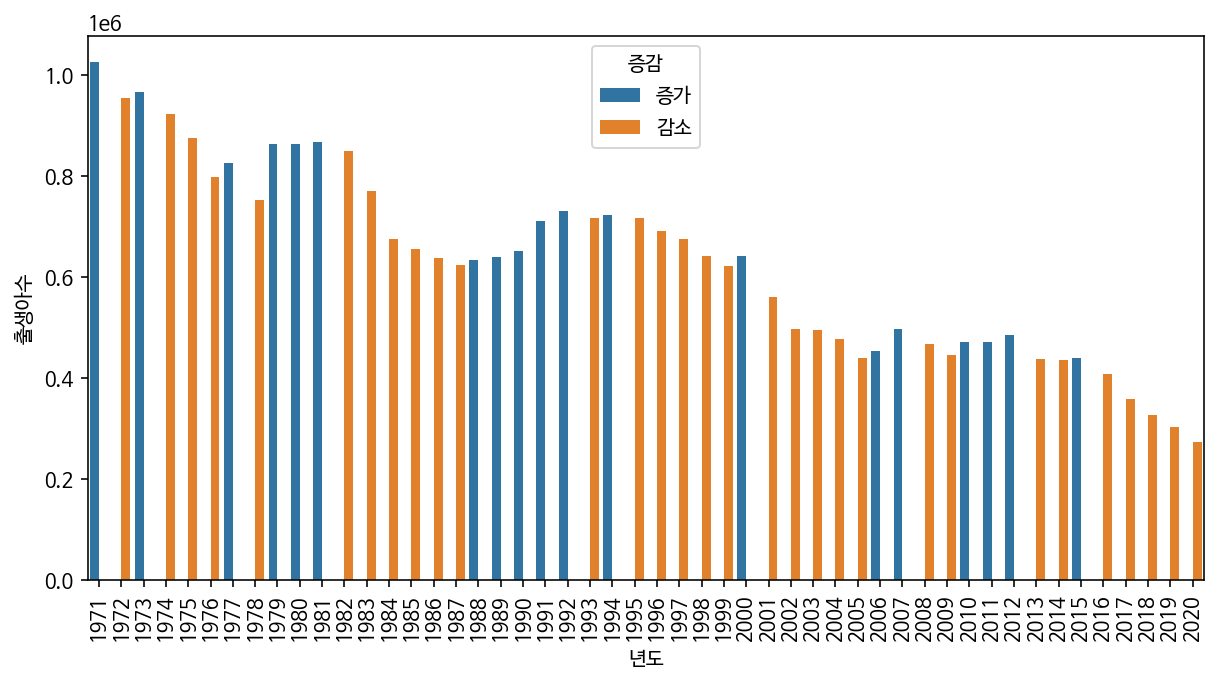

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='년도', y='출생아수',hue='증감', data=df)
plt.xticks(range(len(df)), labels=df['년도'], rotation=90)
plt.show()

## scatter plot
+ 두 개의 수치값에 대한 관계를 파악

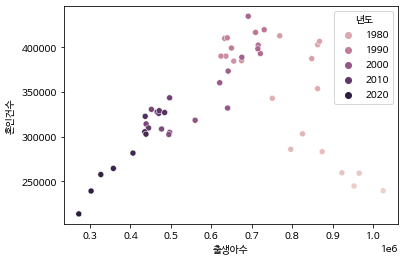

In [26]:
sns.scatterplot(x='출생아수', y='혼인건수', hue='년도', data=df)
plt.show()

In [27]:
df.columns

Index(['년도', '출생아수', '사망자수', '혼인건수', '자연증가수', '전년출생아수', '전년대비출생아수', '증감'], dtype='object')

## pairplot 
+ 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 scatter plot

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


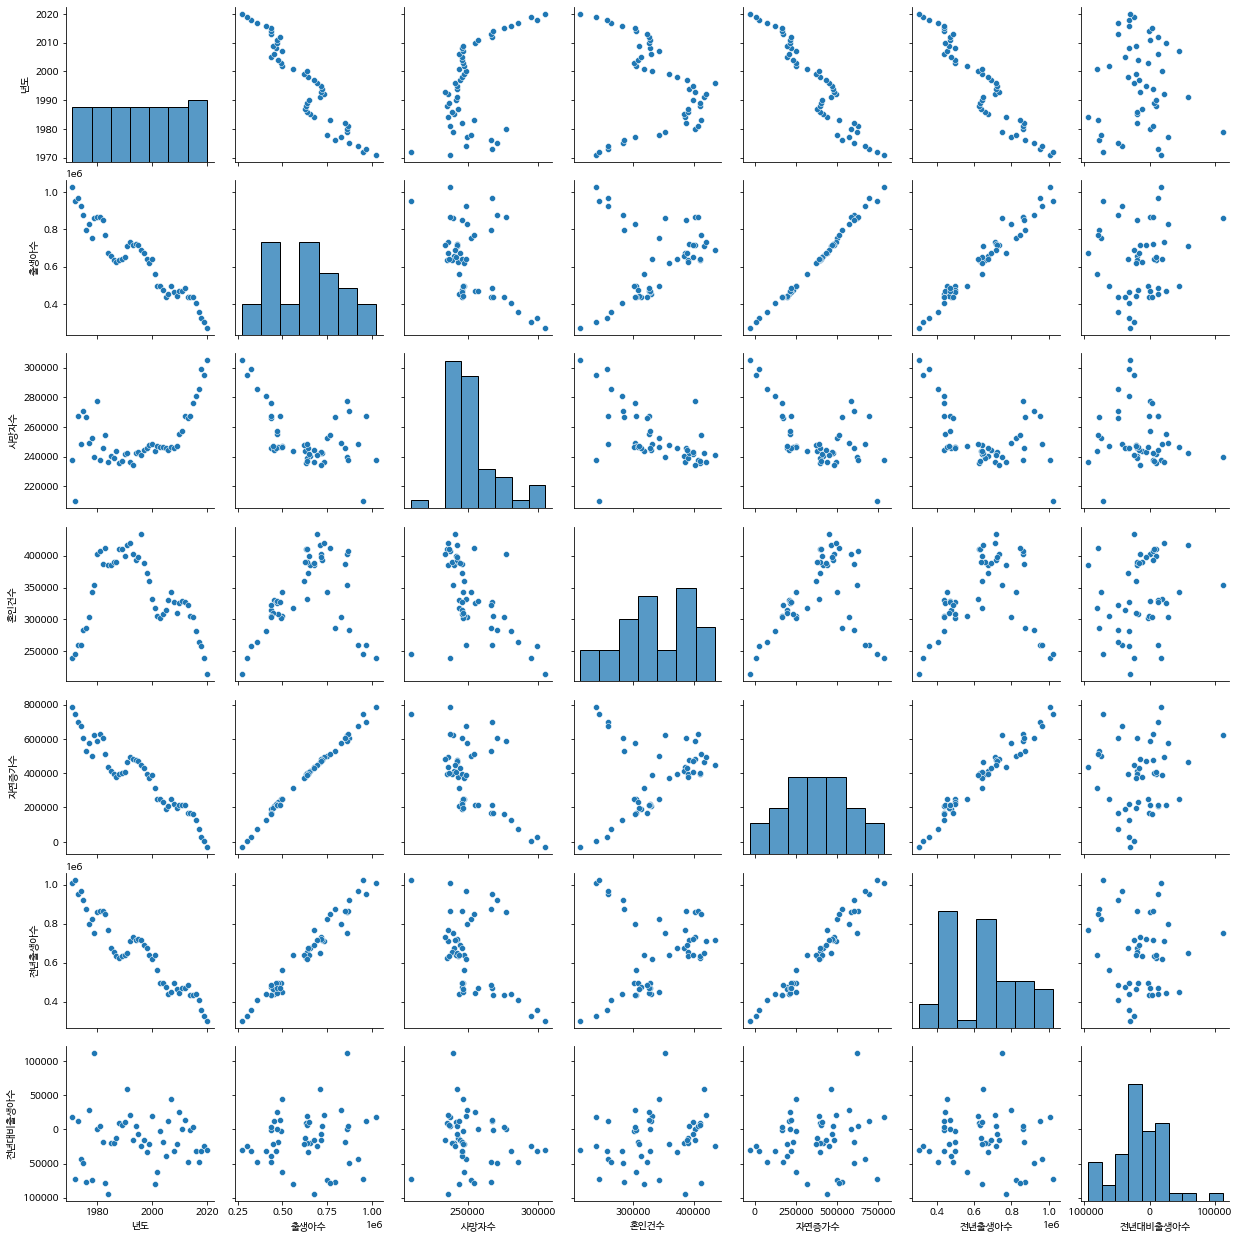

In [28]:
sns.pairplot(data=df)
plt.show()

## heatmap
+ 데이터가 2차원이고 모든 값이 카테고리 값

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


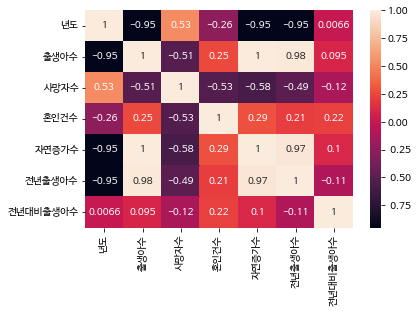

In [29]:
sns.heatmap(df.corr(), annot=True)
plt.show()